# 作業
### 用 digits (dataset.load_digits()) 資料嘗試跑 t-SNE

In [1]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold

%matplotlib inline

In [6]:
# 設定 模型 估計參數
n_sample, n_feature = X.shape

tsne = manifold.TSNE(n_components=2, random_state=0, init='pca', learning_rate=200, early_exaggeration=12)

In [8]:
# 資料建模 並 視覺化 結果
X_tsne = tsne.fit_transform(X)

Text(0.5, 1.0, 't-SNE embedding of the digits')

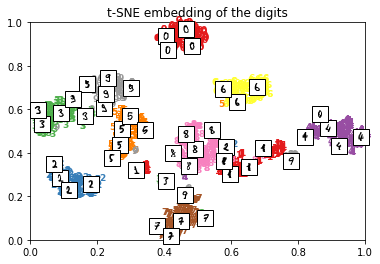

In [26]:
# 最大最小化
x_max = np.max(X_tsne, 0)
x_min = np.min(X_tsne, 0)
X_tsne_maxmin = (X_tsne-x_min) / (x_max-x_min)

#視覺化
#建一個表格區
plt.figure()
ax = plt.subplot(111)

#在表格中點上各點位置(用數字做為圖徵)
for i in range(n_sample):
    plt.text(X_tsne_maxmin[i, 0], X_tsne_maxmin[i, 1], str(y[i]),
            color=plt.cm.Set1(y[i] / 10),
            fontdict={'weight':'bold', 'size':9})

# 呈現該數字影像
if hasattr(offsetbox, 'AnnotationBbox'):
    shown_images=[[1, 1]]
    for i in range(n_sample):
        distance = np.sum((X_tsne_maxmin[i] - shown_images)**2, 1)
        if np.min(distance) < 4e-3: #距離過近不畫
            continue
        shown_images = np.r_[shown_images, [X_tsne_maxmin[i]]]
        imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X_tsne_maxmin[i])
        ax.add_artist(imagebox) 
        
plt.title("t-SNE embedding of the digits")       